<a href="https://colab.research.google.com/github/micaela317/-proyecto_integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: armar un dataframe de al menos 100 filas con datos random con apellido y nombre, numero dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import random
import numpy as np

# Lista de materias escolares de nivel secundario en Argentina
materias = [
    "Matemática", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales",
    "Educación Física", "Inglés", "Física", "Química", "Biología", "Filosofía", "Sociología",
    "Arte", "Música", "Informática"
]

# Lista de apellidos y nombres (puedes agregar más)
apellidos = ["Gómez", "Rodríguez", "López", "Fernández", "García", "Martínez", "Pérez", "González", "Álvarez", "Díaz"]
nombres = ["Juan", "María", "Carlos", "Laura", "Pedro", "Ana", "Luis", "Marta", "José", "Sofía"]


# Función para generar datos aleatorios
def generar_datos(num_filas):
  datos = []
  for _ in range(num_filas):
    apellido = random.choice(apellidos)
    nombre = random.choice(nombres)
    dni = random.randint(10000000, 99999999)
    materia = random.choice(materias)
    nota1 = round(random.uniform(1, 10), 1)
    nota2 = round(random.uniform(1, 10), 1)
    nota3 = round(random.uniform(1, 10), 1)
    faltas = random.randint(0, 15)
    datos.append([apellido, nombre, dni, materia, nota1, nota2, nota3, faltas])
  return datos

# Generar datos para 100 filas
datos_df = generar_datos(100)

# Crear el DataFrame
df = pd.DataFrame(datos_df, columns=["Apellido", "Nombre", "DNI", "Materia", "Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre", "Faltas a clases"])

# Mostrar el DataFrame
df

,Apellido,Nombre,DNI,Materia,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a clases
0,Díaz,Juan,62976784,Química,5.4,9.5,9.7,14
1,Gómez,José,49480609,Filosofía,4.8,3.6,1.6,7
2,Díaz,María,15497642,Geografía,8.6,9.1,9.5,5
3,Pérez,Juan,87981864,Matemática,9.6,9.3,9.4,12
4,Martínez,Ana,67191278,Música,7.4,5.5,7.6,0
...,...,...,...,...,...,...,...,...
95,Díaz,Juan,42126105,Física,9.5,4.5,3.7,9
96,Fernández,Marta,59317585,Arte,4.8,9.6,8.8,10
97,Gómez,Luis,90046632,Lengua y Literatura,3.7,5.8,2.1,13
98,Díaz,Carlos,87561277,Música,2.2,7.4,7.6,7


<ipython-input-2-c932e7da7e45>:31: UserWarning: Legend does not support handles for Axes instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend([ax1, ax2], ["Promedio General", "Cantidad de Faltas"])


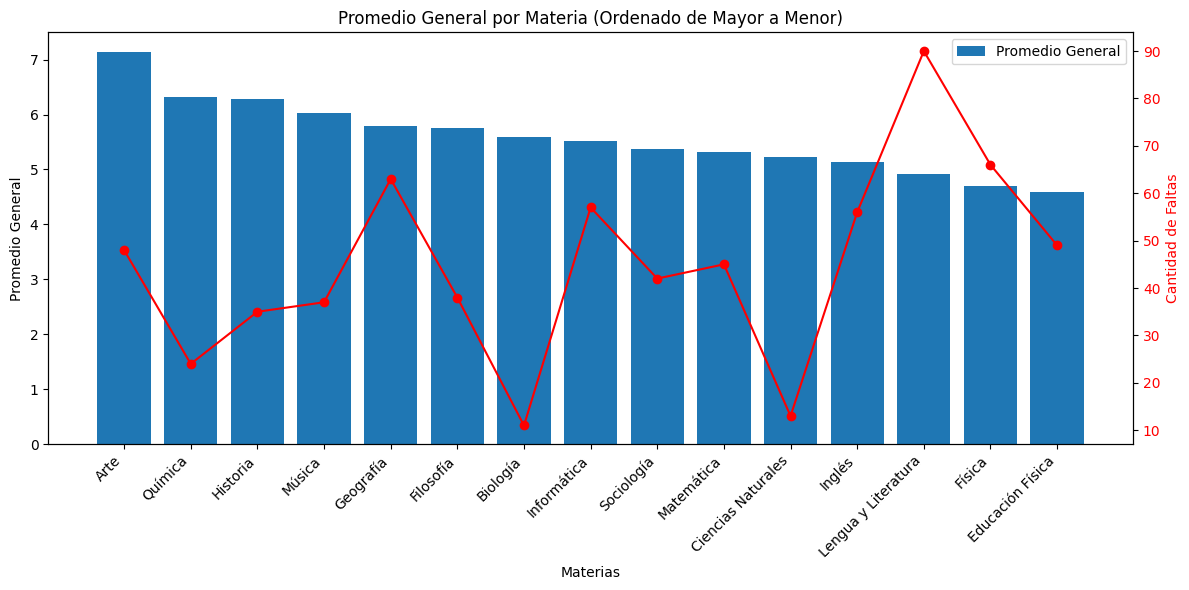

In [2]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt

# Calcular el promedio de cada materia
promedio_materias = df.groupby('Materia')[['Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre']].mean().mean(axis=1)

# Calcular la cantidad de faltas por materia
faltas_materias = df.groupby('Materia')['Faltas a clases'].sum()

# Ordenar las materias por promedio de mayor a menor
promedio_materias_ordenado = promedio_materias.sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
ax1 = plt.bar(promedio_materias_ordenado.index, promedio_materias_ordenado.values)
plt.xlabel("Materias")
plt.ylabel("Promedio General")
plt.title("Promedio General por Materia (Ordenado de Mayor a Menor)")
plt.xticks(rotation=45, ha='right')


# Crear el segundo eje y para las faltas
ax2 = plt.twinx()
ax2.plot(faltas_materias.loc[promedio_materias_ordenado.index].index, faltas_materias.loc[promedio_materias_ordenado.index].values, color='red', marker='o')
ax2.set_ylabel("Cantidad de Faltas", color='red')
ax2.tick_params(axis='y', labelcolor='red')


# Agregar leyenda
plt.legend([ax1, ax2], ["Promedio General", "Cantidad de Faltas"])

plt.tight_layout()
plt.show()

In [3]:
df.to_csv("datos_alumnos.csv", index=False)